KNN

In [1]:
"""pip install --upgrade pandas"""


'pip install --upgrade pandas'

/var/folders/kw/2mf6m7dx0pn9xqtnjjs396700000gn/T/ipykernel_92331/2158784932.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


importing Jupyter notebook from preprocess.ipynb
Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)      2001
Hovedområde start             4124
Lokasjon start (kode)         2001
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)      1962
Hovedområde stopp             4124
Lokasjon stopp (kode)         1962
Havdybde stopp                   0
Trekkavstand                    24
Redskap FAO (kode)               0
Redskap FAO                    188
Redska

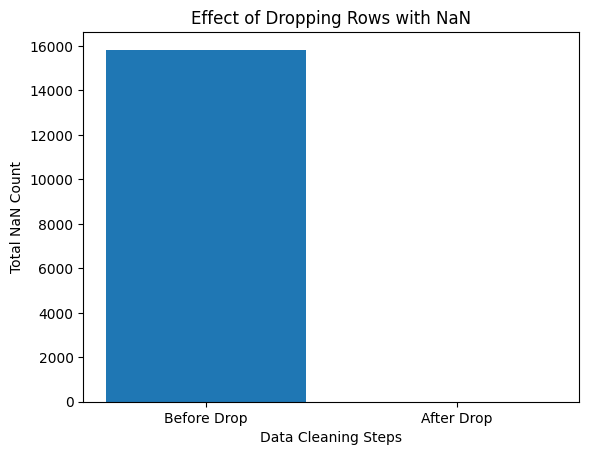

Hovedart FAO
Torsk                   86058
Sei                     66287
Dypvannsreke            36977
Hyse                    28166
Lange                   13387
                        ...  
Sandflyndre                 3
Makrellstørje               2
Various squids nei *        2
Blåhval                     1
Annen laksefisk             1
Name: count, Length: 67, dtype: int64


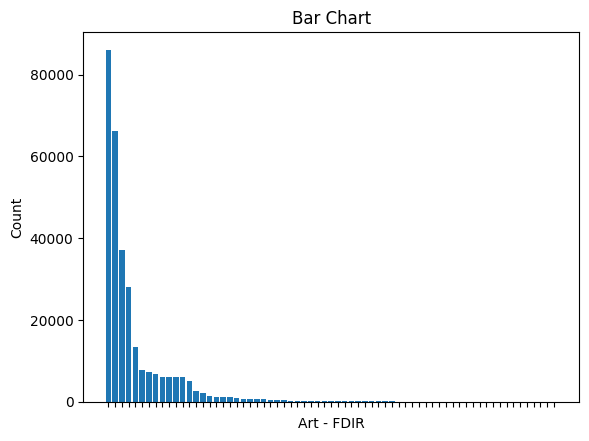

,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart FAO,Art - FDIR,Rundvekt,Bredde,Fartøylengde,Month
1,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,3,Hyse,9594.0,12.60,56.8,12
5,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,3,Hyse,9118.0,12.60,56.8,12
11,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,3,Hyse,12432.0,12.60,56.8,12
17,74.931,15.785,-443.0,243.0,74.926,15.894,-358.0,3214.0,51.0,0,Torsk,7022.0,12.60,56.8,12
19,67.828,12.972,-71.0,63.0,67.827,12.942,-56.0,1269.0,61.0,3,Hyse,4.0,5.06,19.1,1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


"""#execute the entire 'preprosses' notebook in your current notebook
%run preprosses.ipynb"""
import import_ipynb
from preprocess import df
df.head()

Splitting dataset
Vi are divinfing datset into features. We also have to split these into both test and trainingset. So after that we can see if the ML is doing good or not. 

In [3]:
# Assuming your target variable is 'Art - FDIR' 
features = ['Startposisjon bredde', 'Startposisjon lengde', 'Havdybde start', 'Varighet',
    'Stopposisjon bredde', 'Stopposisjon lengde', 'Havdybde stopp', 'Trekkavstand', 
    'Redskap FDIR (kode)', 'Rundvekt', 'Month']
X = df[features]
y = df['Hovedart FAO']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standarisation and scaing 

When we used KNN we decided to normolize, it can be smart to normalize the featurtes because then no feature is very different from one another 
We are leverling out the feild for all features so the KNN works better and make even more accurate predictions  

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply the scaling transformation to the training data (X_train)
# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling transformation to the test data (X_test)
# Transform the test data using the parameters learned from the training data
X_test_scaled = scaler.transform(X_test)


# Make a KNN classefier with the k as 3 

In [5]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier with  3 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = knn_classifier.predict(X_test_scaled)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8642745709828393


# Computing a confuion matrix and visulazing it

Here it is showing a summary of preformance of the classifications models 

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      5103
           1       0.87      0.87      0.87      3693
           2       0.99      0.99      0.99      2674
           3       0.69      0.68      0.68      1497
           4       0.92      0.88      0.90       494

    accuracy                           0.86     13461
   macro avg       0.86      0.85      0.86     13461
weighted avg       0.86      0.86      0.86     13461



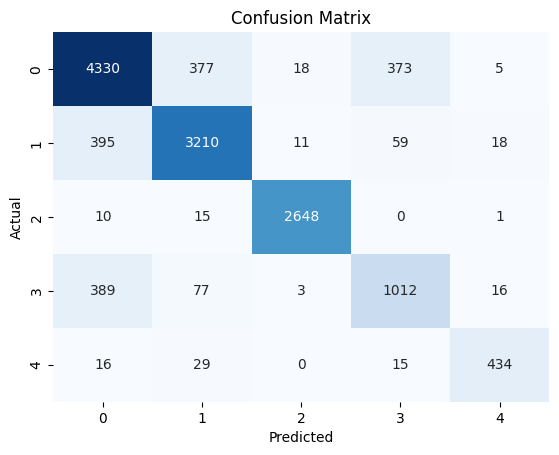

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

# Print the classification report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)
cm = confusion_matrix(y_test, predictions)
# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The diagonal elements of the confusion matrix represent the correct predictions, while the off-diagonal elements represent the incorrect predictions.   
A good model is one which has high correct predictions while few false predictions . The Blue ones that goes diagnonal are the correct predictions. As you can see there are a significant higher number of true predicttions. We have decided to predict this amount of different fish because we wantted the predictions to be fairly correct. 

You can see the numbers within the 300-400 value range. We have concluded that these might be difficult to differenciate because these species are different types of cod. And therefore might be more difficult to differenciate. Some of the squares that are similar in numbers that are not diagnonal are similar because sei and hyse is a type of torsk. And therefore you can seee it is more difficult to predict.

# Taking a look at the data 
If we look at the data we can see that there is more Torsk (cod) than there is Sei. Considering we have more data of Torsk than of Sei we can see that the data is more accurate for the Torsk. This is because it has more data to compare and can become even more accurate. And continuing 

# Looking at over and underfitting 

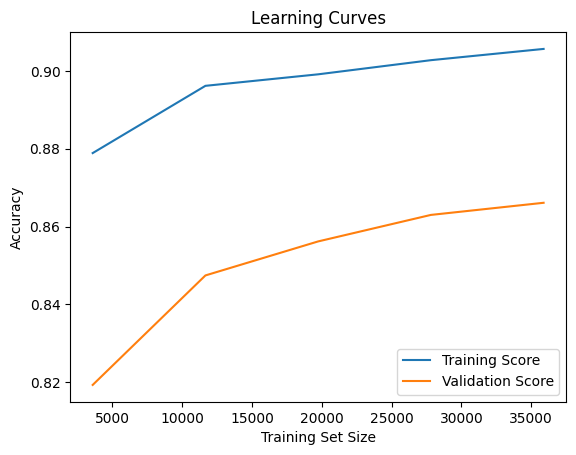

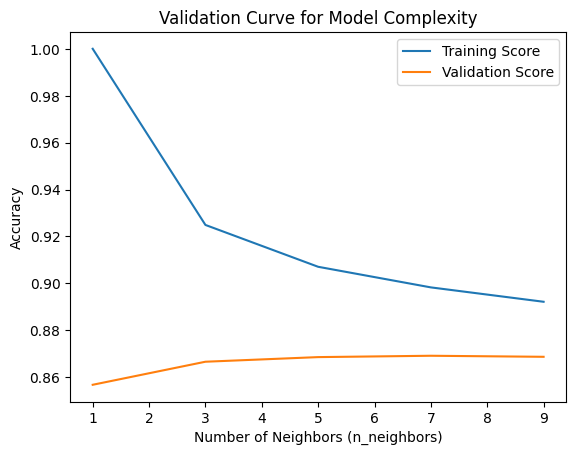

In [7]:
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Define the KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Adjusted learning_curve parameters
train_sizes, train_scores, test_scores = learning_curve(
    knn_classifier, X_train_scaled, y_train, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1,  1.0,  5)
)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves')
plt.show()


param_range = [1, 3, 5, 7, 9]  # Example values for n_neighbors
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train_scaled, y_train, param_name='n_neighbors',
    param_range=param_range, cv=5, scoring='accuracy'
)

plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Curve for Model Complexity')
plt.show()

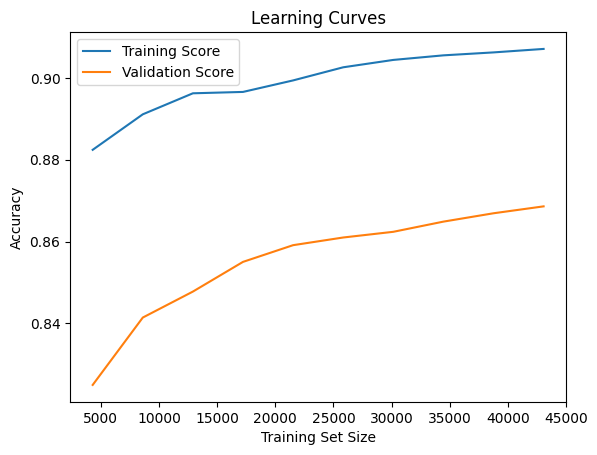

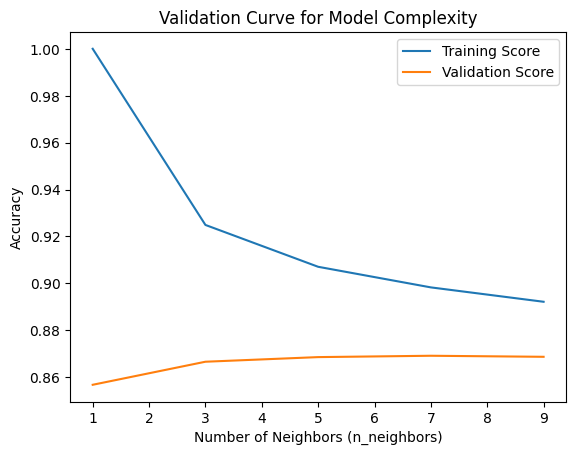

In [8]:
# Assessing Overfitting or Underfitting
from sklearn.model_selection import learning_curve, validation_curve

# 1. Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    knn_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves')
plt.show()

# 2. Validation Curve for Model Complexity
param_range = [1, 3, 5, 7, 9]  # Example values for n_neighbors
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train_scaled, y_train, param_name='n_neighbors',
    param_range=param_range, cv=5, scoring='accuracy'
)

plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Curve for Model Complexity')
plt.show()

The training score is a little higher then validation, wich indicates a little overfitting.